# CheXScan Ensemble Experiments

## Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam as LegacyAdam
from tensorflow.keras.layers import Input, Average

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (299, 299)
CLASSES = ['normal', 'pneumonia', 'tuberculosis']
NUM_CLASSES = len(CLASSES)
EPOCHS = 20

## Data Preprocessing and Augmentation

In [3]:
preprocess_transform = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),
])

data_augmentation_transform = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomWidth(0.2),
])


## Dataset

In [4]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'E:/chexscan/data/train_data/',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'E:/chexscan/data/test_data/',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False
)

Found 2400 files belonging to 3 classes.
Found 600 files belonging to 3 classes.


## Training Parameters

In [5]:
loss_function = 'sparse_categorical_crossentropy'
optimizer = Adam(learning_rate=0.0001)
num_epochs = EPOCHS

## Evaluation Functions

In [6]:
def evaluate_model(model, valid_dataset):
    predictions = []
    true_labels = []
    for images, labels in valid_dataset:
        preds = model.predict(images)
        predictions.extend(np.argmax(preds, axis=1))
        true_labels.extend(labels.numpy())
    return true_labels, predictions

In [7]:
def plot_history_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

## AlexNet


Epoch 1/20


75/75 [==============================] - 273s 4s/step - loss: 2.0091 - accuracy: 0.6850 - val_loss: 0.3856 - val_accuracy: 0.8517
Epoch 2/20
75/75 [==============================] - 250s 3s/step - loss: 0.3316 - accuracy: 0.8604 - val_loss: 0.2693 - val_accuracy: 0.9250
Epoch 3/20
75/75 [==============================] - 244s 3s/step - loss: 0.2748 - accuracy: 0.8850 - val_loss: 0.2604 - val_accuracy: 0.9250
Epoch 4/20
75/75 [==============================] - 245s 3s/step - loss: 0.2248 - accuracy: 0.9092 - val_loss: 0.1837 - val_accuracy: 0.9467
Epoch 5/20
75/75 [==============================] - 248s 3s/step - loss: 0.2109 - accuracy: 0.9158 - val_loss: 0.1669 - val_accuracy: 0.9450
Epoch 6/20
75/75 [==============================] - 246s 3s/step - loss: 0.1912 - accuracy: 0.9254 - val_loss: 0.2105 - val_accuracy: 0.9467
Epoch 7/20
75/75 [==============================] - 245s 3s/step - loss: 0.1619 - accuracy: 0.9333 - val_loss: 0.1339 - val_accuracy: 0.9633
Epoch 8/20

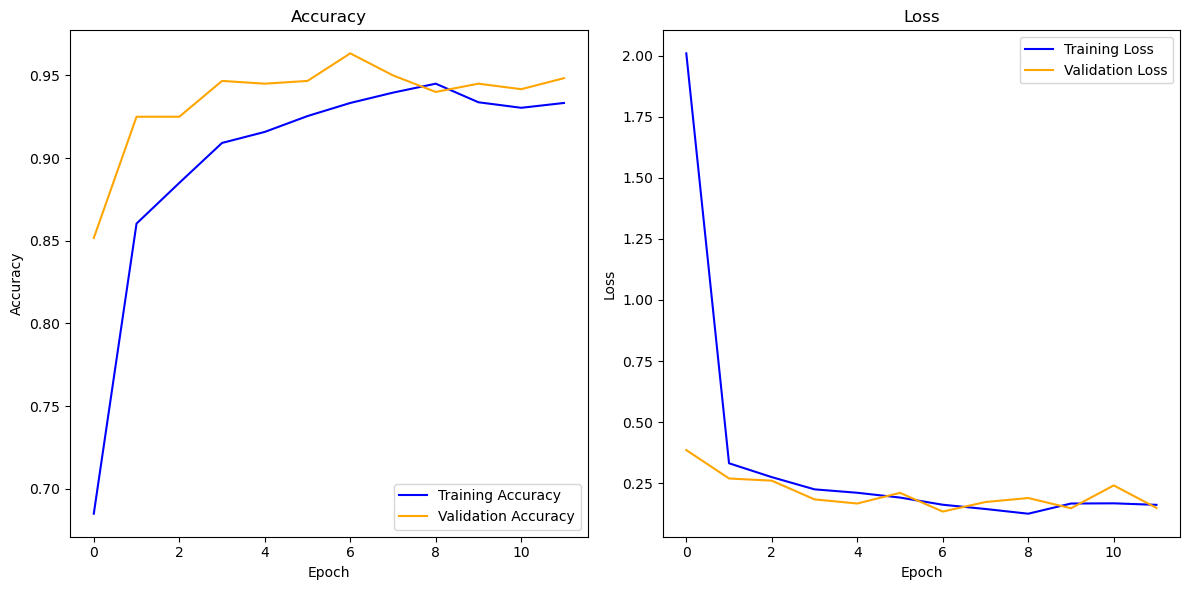

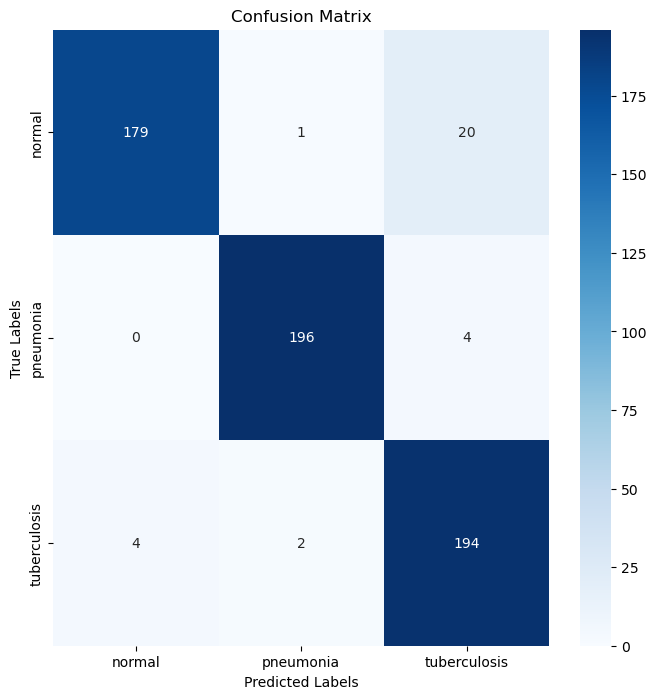

Classification Report for AlexNet:
              precision    recall  f1-score   support

      normal       0.98      0.90      0.93       200
   pneumonia       0.98      0.98      0.98       200
tuberculosis       0.89      0.97      0.93       200

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [9]:
from tensorflow.keras.optimizers import Adam as LegacyAdam
from tensorflow.keras.callbacks import EarlyStopping

alexnet_model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


# Define the optimizer
optimizer = LegacyAdam(learning_rate=0.0001)

# Compile AlexNet model with legacy optimizer
alexnet_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Build optimizer with the full list of trainable variables
optimizer.build(alexnet_model.trainable_variables)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Train AlexNet model with early stopping
history_alexnet = alexnet_model.fit(train_dataset, validation_data=valid_dataset, epochs=num_epochs, callbacks=[early_stopping])

# Evaluate AlexNet model
true_labels_alexnet, predicted_labels_alexnet = evaluate_model(alexnet_model, valid_dataset)
accuracy_alexnet = accuracy_score(true_labels_alexnet, predicted_labels_alexnet)
print("AlexNet Accuracy:", accuracy_alexnet)

# Plot history metrics for AlexNet
plot_history_metrics(history_alexnet)

# Plot confusion matrix for AlexNet
plot_confusion_matrix(true_labels_alexnet, predicted_labels_alexnet, CLASSES)

# Display classification report for AlexNet
print("Classification Report for AlexNet:")
print(classification_report(true_labels_alexnet, predicted_labels_alexnet, target_names=CLASSES))

## DenseNet-121

Epoch 1/20
75/75 [==============================] - 897s 12s/step - loss: 0.3233 - accuracy: 0.8667 - val_loss: 0.1499 - val_accuracy: 0.9350
Epoch 2/20
75/75 [==============================] - 861s 11s/step - loss: 0.0995 - accuracy: 0.9629 - val_loss: 0.0234 - val_accuracy: 0.9933
Epoch 3/20
75/75 [==============================] - 868s 11s/step - loss: 0.0665 - accuracy: 0.9767 - val_loss: 0.0732 - val_accuracy: 0.9683
Epoch 4/20
75/75 [==============================] - 899s 12s/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0202 - val_accuracy: 0.9933
Epoch 5/20
75/75 [==============================] - 880s 12s/step - loss: 0.0413 - accuracy: 0.9842 - val_loss: 0.0175 - val_accuracy: 0.9950
Epoch 6/20
75/75 [==============================] - 854s 11s/step - loss: 0.0270 - accuracy: 0.9887 - val_loss: 0.0533 - val_accuracy: 0.9783
Epoch 7/20
75/75 [==============================] - 856s 11s/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0784 - val_accuracy: 0.9733
Epoch 

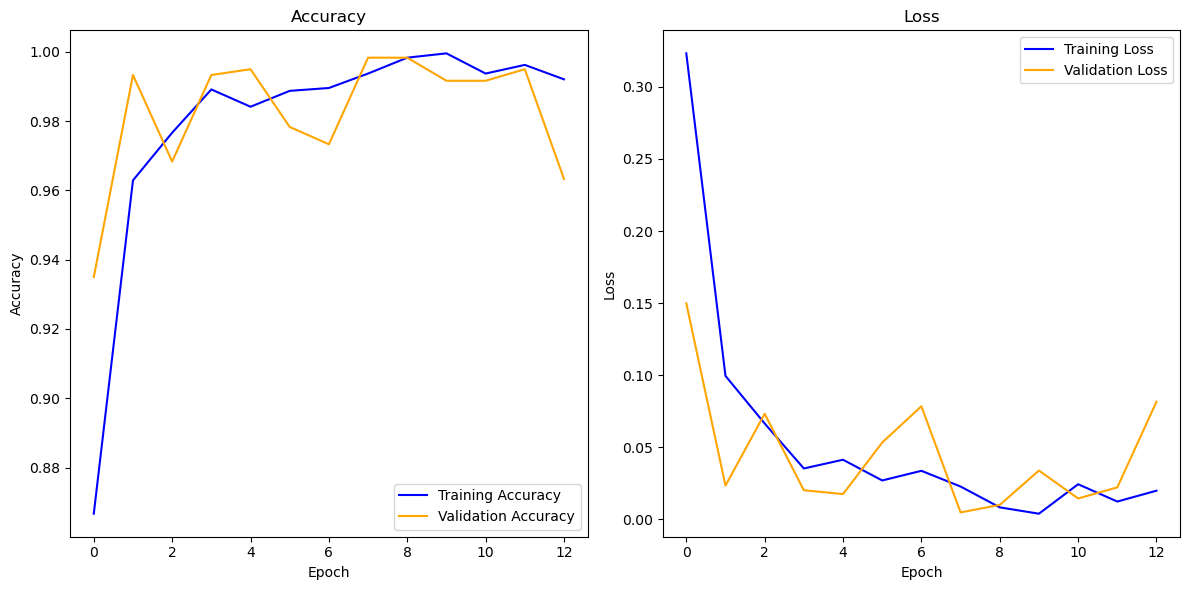

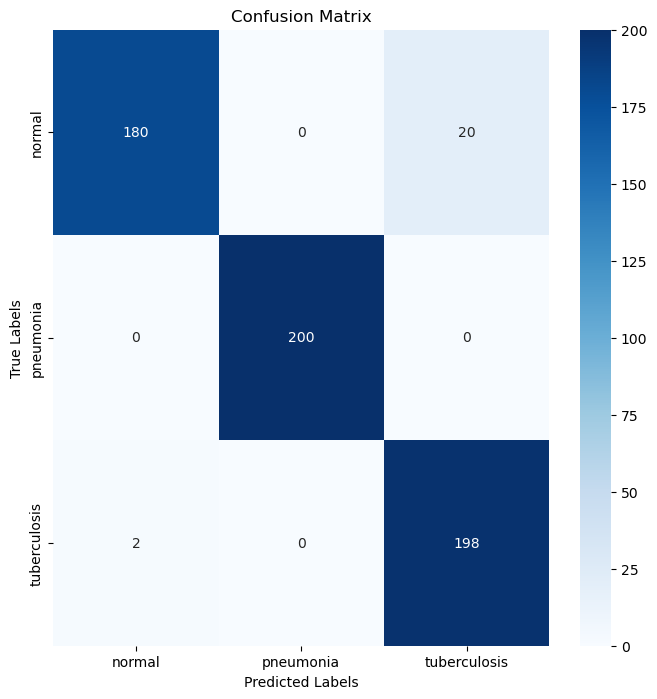

Classification Report for DenseNet121:
              precision    recall  f1-score   support

      normal       0.99      0.90      0.94       200
   pneumonia       1.00      1.00      1.00       200
tuberculosis       0.91      0.99      0.95       200

    accuracy                           0.96       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.96      0.96       600



In [10]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam as LegacyAdam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Define top layers for the model
densenet_top = tf.keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Combine base model with top layers
densenet_model = tf.keras.Model(inputs=densenet_model.input, outputs=densenet_top(densenet_model.output))

# Define the optimizer
optimizer = LegacyAdam(learning_rate=0.0001)

# Compile DenseNet121 model with legacy optimizer
densenet_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Build optimizer with the full list of trainable variables
optimizer.build(densenet_model.trainable_variables)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Train DenseNet121 model with early stopping
history_densenet = densenet_model.fit(train_dataset, validation_data=valid_dataset, epochs=num_epochs, callbacks=[early_stopping])

# Evaluate DenseNet121 model
true_labels_densenet, predicted_labels_densenet = evaluate_model(densenet_model, valid_dataset)
accuracy_densenet = accuracy_score(true_labels_densenet, predicted_labels_densenet)
print("DenseNet121 Accuracy:", accuracy_densenet)

# Plot history metrics for DenseNet121
plot_history_metrics(history_densenet)

# Plot confusion matrix for DenseNet121
plot_confusion_matrix(true_labels_densenet, predicted_labels_densenet, CLASSES)

# Display classification report for DenseNet121
print("Classification Report for DenseNet121:")
print(classification_report(true_labels_densenet, predicted_labels_densenet, target_names=CLASSES))


## ResNet-50

Epoch 1/20
75/75 [==============================] - 1087s 14s/step - loss: 0.2461 - accuracy: 0.9038 - val_loss: 0.2200 - val_accuracy: 0.9133
Epoch 2/20
75/75 [==============================] - 1069s 14s/step - loss: 0.0841 - accuracy: 0.9650 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 3/20
75/75 [==============================] - 1070s 14s/step - loss: 0.0463 - accuracy: 0.9837 - val_loss: 0.1417 - val_accuracy: 0.9367
Epoch 4/20
75/75 [==============================] - 1070s 14s/step - loss: 0.0384 - accuracy: 0.9867 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 5/20
75/75 [==============================] - 1072s 14s/step - loss: 0.0274 - accuracy: 0.9896 - val_loss: 0.0661 - val_accuracy: 0.9700
Epoch 6/20
75/75 [==============================] - 1072s 14s/step - loss: 0.0444 - accuracy: 0.9850 - val_loss: 0.2760 - val_accuracy: 0.9250
Epoch 7/20
75/75 [==============================] - 1070s 14s/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0191 - val_accuracy: 0.9950

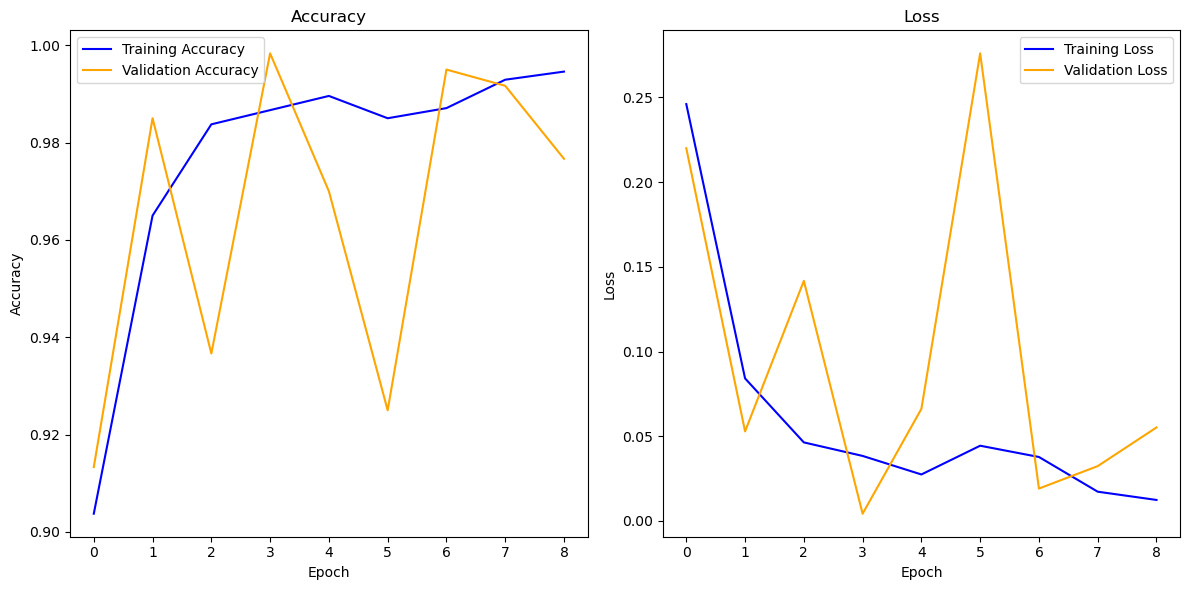

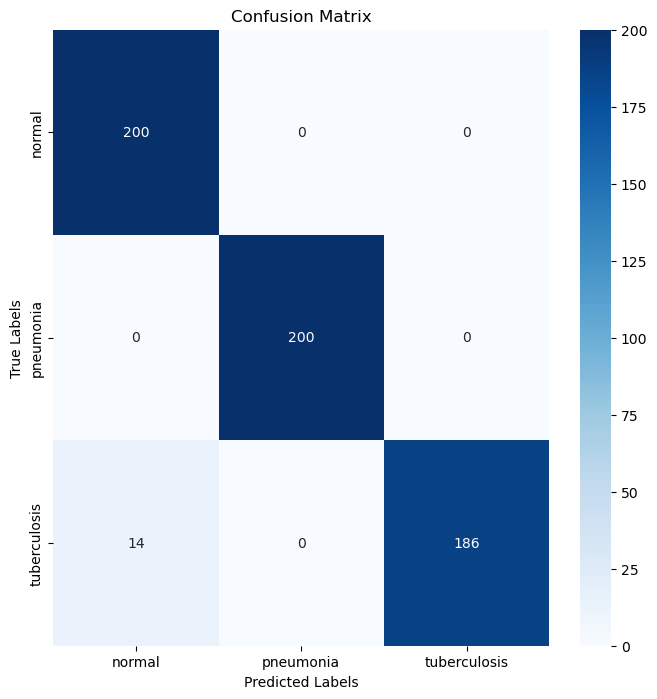

Classification Report for ResNet50:
              precision    recall  f1-score   support

      normal       0.93      1.00      0.97       200
   pneumonia       1.00      1.00      1.00       200
tuberculosis       1.00      0.93      0.96       200

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Define top layers for the model
resnet_top = tf.keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Combine base model with top layers
resnet_model = tf.keras.Model(inputs=resnet_model.input, outputs=resnet_top(resnet_model.output))

# Build optimizer with the full list of trainable variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
optimizer.build(resnet_model.trainable_variables)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Compile ResNet50 model with Adam optimizer
resnet_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Train ResNet50 model with early stopping
history_resnet = resnet_model.fit(train_dataset, validation_data=valid_dataset, epochs=num_epochs, callbacks=[early_stopping])

# Evaluate ResNet50 model
true_labels_resnet, predicted_labels_resnet = evaluate_model(resnet_model, valid_dataset)
accuracy_resnet = accuracy_score(true_labels_resnet, predicted_labels_resnet)
print("ResNet50 Accuracy:", accuracy_resnet)

# Plot history metrics for ResNet50
plot_history_metrics(history_resnet)

# Plot confusion matrix for ResNet50
plot_confusion_matrix(true_labels_resnet, predicted_labels_resnet, CLASSES)

# Display classification report for ResNet50
print("Classification Report for ResNet50:")
print(classification_report(true_labels_resnet, predicted_labels_resnet, target_names=CLASSES))


## VGG-16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Define top layers for the model
vgg_top = tf.keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Combine base model with top layers
vgg_model = tf.keras.Model(inputs=vgg_model.input, outputs=vgg_top(vgg_model.output))

# Build optimizer with the full list of trainable variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
optimizer.build(vgg_model.trainable_variables)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Compile VGG16 model with Adam optimizer
vgg_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Train VGG16 model with early stopping
history_vgg = vgg_model.fit(train_dataset, validation_data=valid_dataset, epochs=num_epochs, callbacks=[early_stopping])

# Evaluate VGG16 model
true_labels_vgg, predicted_labels_vgg = evaluate_model(vgg_model, valid_dataset)
accuracy_vgg = accuracy_score(true_labels_vgg, predicted_labels_vgg)
print("VGG16 Accuracy:", accuracy_vgg)

# Plot history metrics for VGG16
plot_history_metrics(history_vgg)

# Plot confusion matrix for VGG16
plot_confusion_matrix(true_labels_vgg, predicted_labels_vgg, CLASSES)

# Display classification report for VGG16
print("Classification Report for VGG16:")
print(classification_report(true_labels_vgg, predicted_labels_vgg, target_names=CLASSES))


Epoch 1/20
75/75 [==============================] - 3589s 48s/step - loss: 0.8028 - accuracy: 0.6292 - val_loss: 0.3518 - val_accuracy: 0.8150
Epoch 2/20
75/75 [==============================] - 3585s 48s/step - loss: 0.3599 - accuracy: 0.8388 - val_loss: 0.1661 - val_accuracy: 0.9317
Epoch 3/20
75/75 [==============================] - 3587s 48s/step - loss: 0.2235 - accuracy: 0.9083 - val_loss: 0.1058 - val_accuracy: 0.9850
Epoch 4/20
75/75 [==============================] - 3585s 48s/step - loss: 0.2420 - accuracy: 0.9029 - val_loss: 0.1156 - val_accuracy: 0.9650
Epoch 5/20
75/75 [==============================] - 3608s 48s/step - loss: 0.1952 - accuracy: 0.9204 - val_loss: 0.1422 - val_accuracy: 0.9633
Epoch 6/20
75/75 [==============================] - 3643s 49s/step - loss: 0.1941 - accuracy: 0.9242 - val_loss: 0.1300 - val_accuracy: 0.9600
Epoch 7/20
75/75 [==============================] - 3597s 48s/step - loss: 0.1302 - accuracy: 0.9488 - val_loss: 0.1109 - val_accuracy: 0.9650

## Inception V3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Define top layers for the model
inception_top = tf.keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Combine base model with top layers
inception_model = tf.keras.Model(inputs=inception_model.input, outputs=inception_top(inception_model.output))

# Build optimizer with the full list of trainable variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
optimizer.build(inception_model.trainable_variables)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Compile InceptionV3 model with the built optimizer
inception_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Train InceptionV3 model with early stopping
history_inception = inception_model.fit(train_dataset, validation_data=valid_dataset, epochs=num_epochs, callbacks=[early_stopping])

# Evaluate InceptionV3 model
true_labels_inception, predicted_labels_inception = evaluate_model(inception_model, valid_dataset)
accuracy_inception = accuracy_score(true_labels_inception, predicted_labels_inception)
print("InceptionV3 Accuracy:", accuracy_inception)

# Plot history metrics for InceptionV3
plot_history_metrics(history_inception)

# Plot confusion matrix for InceptionV3
plot_confusion_matrix(true_labels_inception, predicted_labels_inception, CLASSES)

# Display classification report for InceptionV3
print("Classification Report for InceptionV3:")
print(classification_report(true_labels_inception, predicted_labels_inception, target_names=CLASSES))


In [ ]:
import matplotlib.pyplot as plt

# Convert accuracies to percentages
accuracy_alexnet_percent = accuracy_alexnet * 100
accuracy_densenet_percent = accuracy_densenet * 100
accuracy_inception_percent = accuracy_inception * 100
accuracy_resnet_percent = accuracy_resnet * 100
accuracy_vgg_percent = accuracy_vgg * 100

# Print accuracy for each model in percentage
print(f"AlexNet Accuracy: {accuracy_alexnet_percent:.2f}%")
print(f"DenseNet121 Accuracy: {accuracy_densenet_percent:.2f}%")
print(f"InceptionV3 Accuracy: {accuracy_inception_percent:.2f}%")
print(f"ResNet50 Accuracy: {accuracy_resnet_percent:.2f}%")
print(f"VGG16 Accuracy: {accuracy_vgg_percent:.2f}%")

# Plotting the accuracies
models = ['AlexNet', 'DenseNet121', 'InceptionV3', 'ResNet50', 'VGG16']
accuracies = [accuracy_alexnet_percent, accuracy_densenet_percent, accuracy_inception_percent, accuracy_resnet_percent, accuracy_vgg_percent]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Ensemble

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the names of the models
model_names = ["AlexNet", "DenseNet121", "InceptionV3", "ResNet50", "VGG16"]

# Print accuracies of all 5 models
for i, (model, name) in enumerate(zip(top_models[:3], model_names[:3]), start=1):
    accuracy = model.evaluate(valid_dataset)[1]
    print(f"Accuracy of Model {i} ({name}): {accuracy:.4f}")

In [ ]:
# Select top 3 models
top3_models = top_models[:3]

# Combine predictions of the top 3 models by averaging
def ensemble_predict(image, models):
    predictions = [model.predict(np.expand_dims(image, axis=0)) for model in models]
    return np.mean(predictions, axis=0)

In [ ]:
# Load and preprocess the image
image_path = "E:/chexscan/exp/test/pneumonia.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = cv2.resize(image, (299, 299))  # Resize to the required input size
image = image / 255.0  # Normalize the pixel values

# Get ensemble predictions for the image
ensemble_predictions = ensemble_predict(image, top3_models)

# Display the ensemble predictions for the image
for class_index, class_name in enumerate(CLASSES):
    print(f"Ensemble Prediction for class '{class_name}': {ensemble_predictions[0][class_index]:.2f}")

# Convert predictions to class labels
predicted_class_indices = np.argmax(ensemble_predictions, axis=1)
predicted_class_names = [CLASSES[i] for i in predicted_class_indices]

In [ ]:
# Define the input shape based on your models
input_shape = (299, 299, 3)  # Example input shape for RGB images of size 299x299

# Define inputs for the ensemble model
ensemble_inputs = [Input(shape=input_shape) for _ in range(len(top3_models))]

# Get outputs of the top 3 models
model_outputs = [model(inputs) for model, inputs in zip(top3_models, ensemble_inputs)]

# Average the outputs
ensemble_output = Average()(model_outputs)

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_inputs, outputs=ensemble_output)

# Compile the ensemble model (if needed)
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import joblib

# Save the ensemble model using joblib
ensemble_model_path = "ensemble_model_01.pkl"
joblib.dump(ensemble_model, ensemble_model_path)


# Make predictions using the ensemble model
predictions = ensemble_model.predict(input_image)

# Extract class names and corresponding probabilities
class_names = ["normal", "pneumonia", "tuberculosis"]  # Replace with your actual class names
probabilities = predictions[0]

# Sort the probabilities in descending order
sorted_indices = np.argsort(probabilities)[::-1]

# Display the top predicted class and its confidence
top_class = class_names[sorted_indices[0]]
top_confidence = probabilities[sorted_indices[0]]
print(f"Top predicted class: {top_class}, Confidence: {top_confidence:.2f}")

# Display the next two predicted classes and their confidences
for i in range(1, 3):
    class_name = class_names[sorted_indices[i]]
    confidence = probabilities[sorted_indices[i]]
    print(f"Predicted class {i+1}: {class_name}, Confidence: {confidence:.2f}")
